In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [136]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [137]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [138]:
df.shape

(5000, 14)

In [139]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [140]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [141]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [142]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [143]:
for col in df:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])

In [144]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,2,4,33,3,19,0,0,0,1,0,0,0
1,22,22,22,2,18,0,0,0,1,0,0,0
2,16,18,3,0,12,0,0,0,0,0,0,0
3,12,12,74,0,34,1,0,0,0,0,0,0
4,12,11,31,3,12,1,0,0,0,0,0,1


In [145]:
cols = set(df.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Education',
 'Securities Account',
 'Online',
 'CD Account',
 'Family',
 'CreditCard']

In [146]:
for col in cols_categorical:
    df[col] = df[col].astype('object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   Family              5000 non-null   object
 4   CCAvg               5000 non-null   int64 
 5   Education           5000 non-null   object
 6   Mortgage            5000 non-null   int64 
 7   Personal Loan       5000 non-null   int64 
 8   Securities Account  5000 non-null   object
 9   CD Account          5000 non-null   object
 10  Online              5000 non-null   object
 11  CreditCard          5000 non-null   object
dtypes: int64(6), object(6)
memory usage: 468.9+ KB


In [148]:
df_num = df.select_dtypes(include=['int64','float64']).drop("Personal Loan",axis=1)
df_cat = df.select_dtypes(include='object')

In [149]:
df_num.head()

,Age,Experience,Income,CCAvg,Mortgage
0,2,4,33,19,0
1,22,22,22,18,0
2,16,18,3,12,0
3,12,12,74,34,0
4,12,11,31,12,0


In [150]:
df_cat.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard
0,3,0,1,0,0,0
1,2,0,1,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,3,1,0,0,0,1


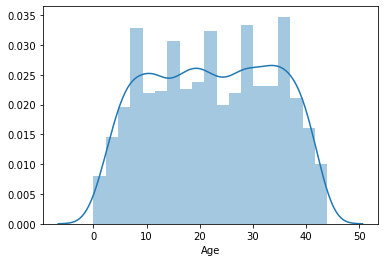

Age - -0.029331878574766698
-----------------------------------------------


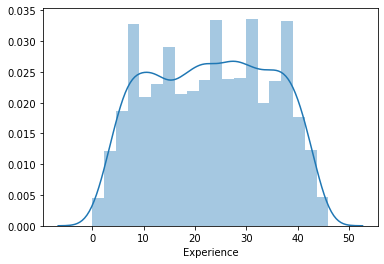

Experience - -0.026316790337654442
-----------------------------------------------


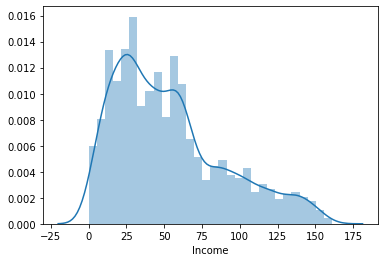

Income - 0.8373570847165455
-----------------------------------------------


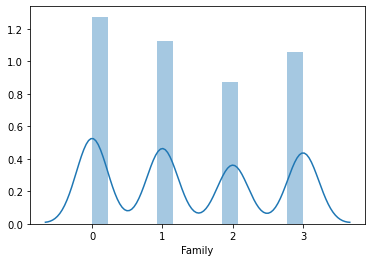

Family - 0.15517409936177615
-----------------------------------------------


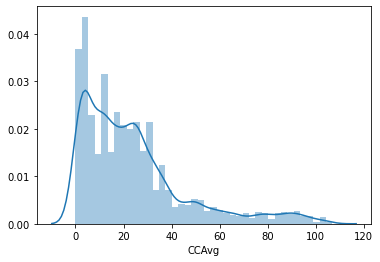

CCAvg - 1.4981213517265566
-----------------------------------------------


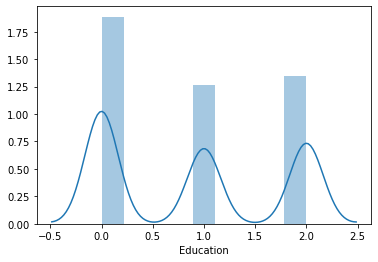

Education - 0.22702518198808114
-----------------------------------------------


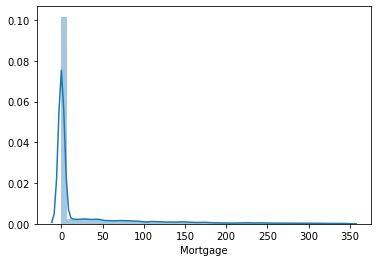

Mortgage - 2.481446859732908
-----------------------------------------------


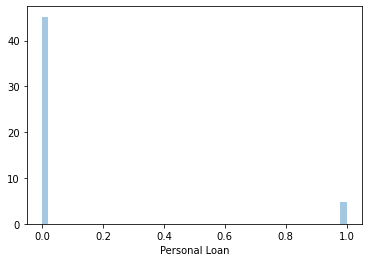

Personal Loan - 2.74278350529752
-----------------------------------------------


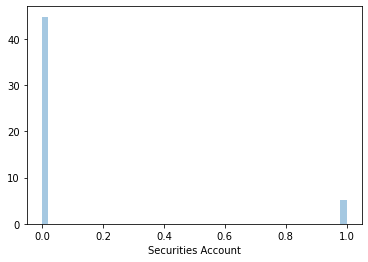

Securities Account - 2.587491827731691
-----------------------------------------------


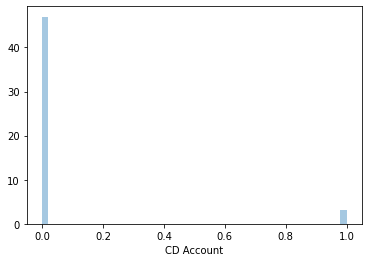

CD Account - 3.690606191969609
-----------------------------------------------


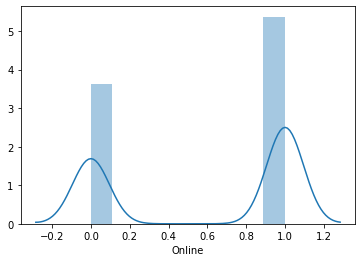

Online - -0.3946668814544109
-----------------------------------------------


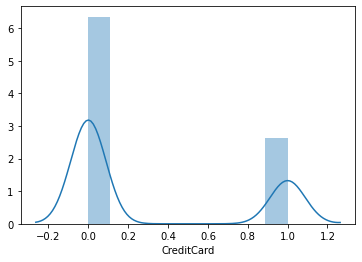

CreditCard - 0.9043180519697602
-----------------------------------------------


In [151]:
for col in df:
    plt.figure()
    sns.distplot(df[col])
    plt.show()
    
    print(col,"-",skew(df[col]))
    print("-----------------------------------------------")

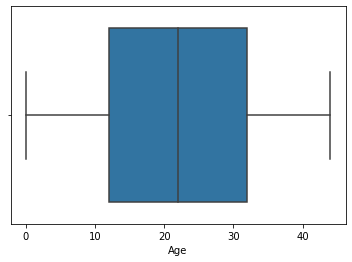

Age
-----------------------------------------------


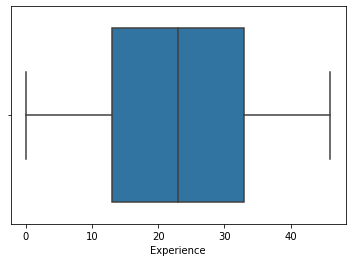

Experience
-----------------------------------------------


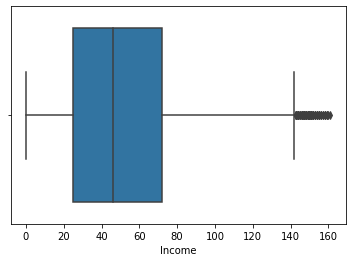

Income
-----------------------------------------------


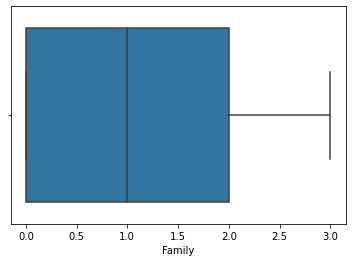

Family
-----------------------------------------------


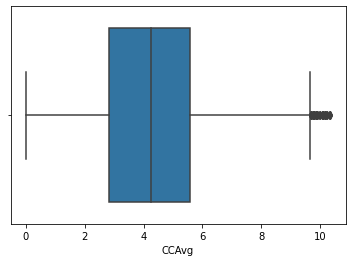

CCAvg
-----------------------------------------------


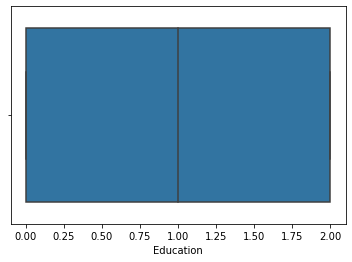

Education
-----------------------------------------------


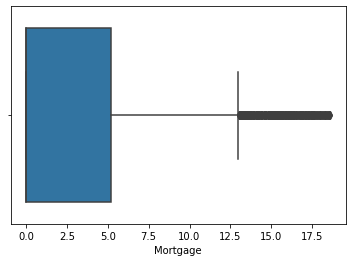

Mortgage
-----------------------------------------------


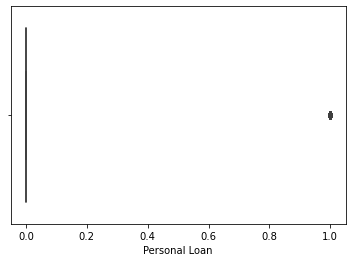

Personal Loan
-----------------------------------------------


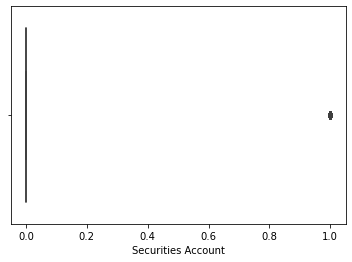

Securities Account
-----------------------------------------------


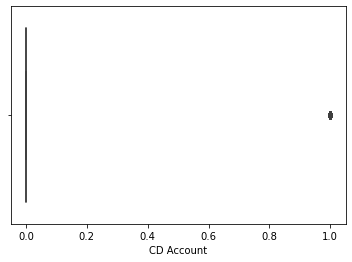

CD Account
-----------------------------------------------


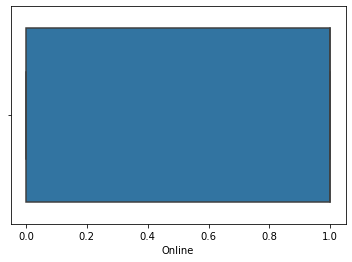

Online
-----------------------------------------------


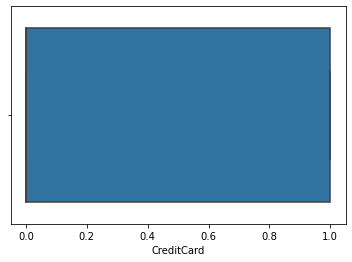

CreditCard
-----------------------------------------------


In [201]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

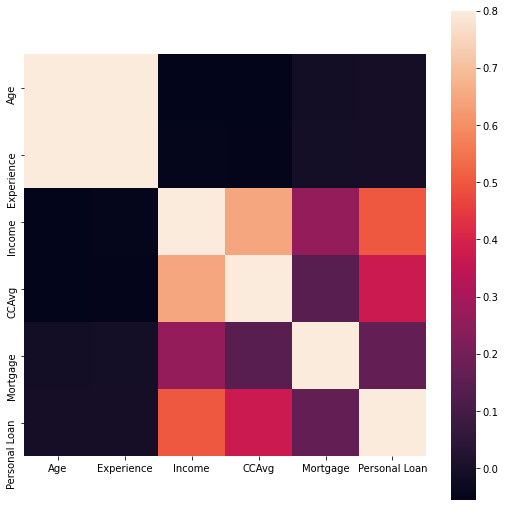

In [152]:

%matplotlib inline 
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [153]:
df["Mortgage"] = np.sqrt(df["Mortgage"])
df["CCAvg"] = np.sqrt(df["CCAvg"])

In [154]:
df_num.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.338400,23.104600,53.323200,24.028600,31.851400
std,11.463166,11.467954,36.837613,22.231838,67.252601
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,13.000000,25.000000,8.000000,0.000000
50%,22.000000,23.000000,46.000000,18.000000,0.000000
75%,32.000000,33.000000,72.000000,31.000000,27.000000
max,44.000000,46.000000,161.000000,107.000000,346.000000


In [155]:

df_new = pd.concat([df_cat,df_num],axis=1)

In [156]:
df_new.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,3,0,1,0,0,0,2,4,33,19,0
1,2,0,1,0,0,0,22,22,22,18,0
2,0,0,0,0,0,0,16,18,3,12,0
3,0,1,0,0,0,0,12,12,74,34,0
4,3,1,0,0,0,1,12,11,31,12,0


In [157]:

X = df_new
y = df["Personal Loan"]

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [161]:
y_pred = lr.predict(X_test)

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.82      0.58      0.68       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
dt = DecisionTreeClassifier()

In [165]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [166]:
y_pred = dt.predict(X_test)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.87      0.89       149

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rt =RandomForestClassifier(n_estimators=200,max_depth=10)
rt.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [171]:
y_pred = rt.predict(X_test)

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.85      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [173]:
from sklearn.ensemble import GradientBoostingClassifier

In [198]:
gc =RandomForestClassifier(n_estimators=200,max_depth=10)
gc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [199]:
y_pred = gc.predict(X_test)

In [200]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.84      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500

